### In this notebook, we will conduct a series of descriptive analysis as part of the data exploration process. By the end of this, we should have a better high-level understanding of each dataset.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil

In [2]:
# Load data
df = pd.read_csv('../cleaned_data/cleaned_data.csv')
df_artist = pd.read_csv('../cleaned_data/cleaned_data_by_artist.csv')
df_genre = pd.read_csv('../cleaned_data/cleaned_data_by_genres.csv')
df_year = pd.read_csv('../cleaned_data/cleaned_data_by_year.csv')

#### On a per song level

In [3]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,0.0768,122.076,0.2990,1920


In [4]:
# How many songs are there in the dataset?
df.shape

(174389, 18)

In [5]:
# Grab only the numerical columns
df_audio_features = df[['danceability', 'energy', 'valence', 
             'acousticness', 'liveness', 'loudness', 'speechiness', 'instrumentalness']]
df_music_char = df[['key', 'mode', 'tempo']]
df_other = df[['popularity', 'duration_ms', 'explicit']]

# Converting duration_ms to duration_s for plotting purpose
df_other['duration_ms'] = round(df_other['duration_ms']/1000).astype('int')
df_other = df_other.rename(columns={'duration_ms': 'duration_s'})

/Users/ZTC/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


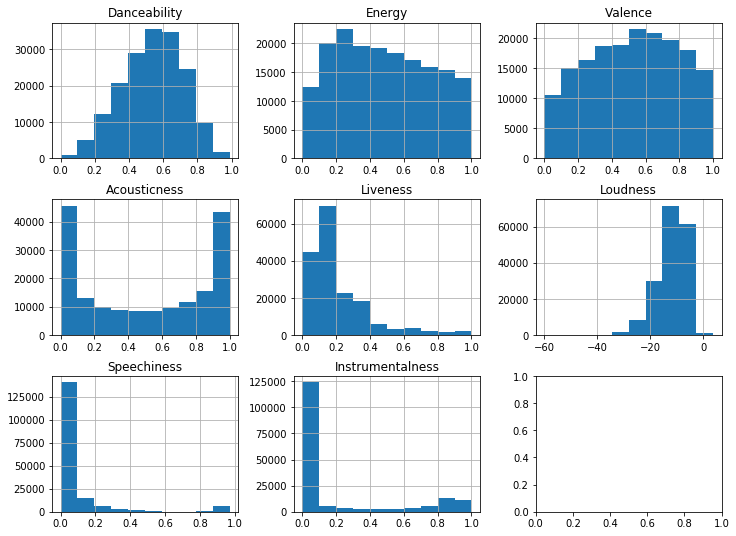

In [6]:
# Plotting Audio Features
fig, axes = plt.subplots(ceil(len(df_audio_features.columns)/3), 3, figsize=(12, 9))

i = 0
for triaxis in axes:
    for axis in triaxis:
        if i < len(df_audio_features.columns):
            df_audio_features.hist(column = df_audio_features.columns[i], ax=axis)
            axis.set_title(f'{df_audio_features.columns[i].capitalize()}')
            i = i + 1
            
# Save figure
fig.savefig('../images/hist_audio_features.png')

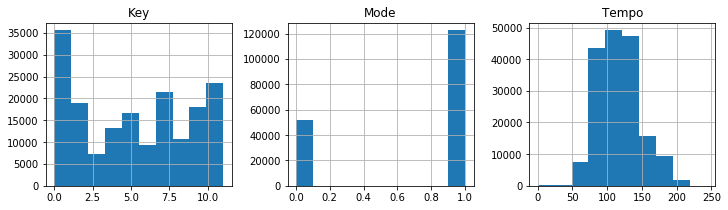

In [7]:
# Plotting Music Characteristics
fig, axes = plt.subplots(ceil(len(df_music_char.columns)/3), 3, figsize=(12, 3))

i = 0
for triaxis in axes:
#     for axis in triaxis:
        if i < len(df_music_char.columns):
            df_music_char.hist(column = df_music_char.columns[i], ax=triaxis)
            triaxis.set_title(f'{df_music_char.columns[i].capitalize()}')
            i = i + 1

# Save figure
fig.savefig('../images/hist_music_characteristics.png')

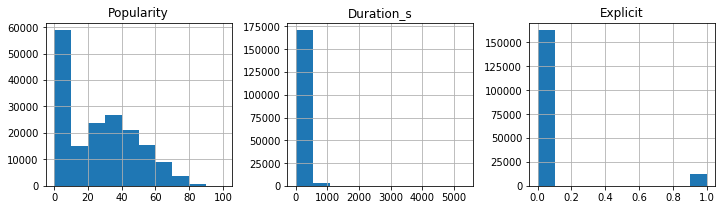

In [8]:
# Plotting Other
fig, axes = plt.subplots(ceil(len(df_other.columns)/3), 3, figsize=(12, 3))

i = 0
for triaxis in axes:
#     for axis in triaxis:
        if i < len(df_other.columns):
            df_other.hist(column = df_other.columns[i], ax=triaxis)
            triaxis.set_title(f'{df_other.columns[i].capitalize()}')
            i = i + 1

# Save figure
fig.savefig('../images/hist_other_characteristics.png')

## Question: Who are the most timeless artists?

In [9]:
# Create a song count dataframe by each year and each artist to look artists' entire career
song_count = pd.DataFrame(df.groupby('artists')['id'].count()).reset_index()
song_count = song_count.rename(columns={'id': 'song count'})

year_count = pd.DataFrame(df.groupby('year')['artists'].value_counts())
year_count = year_count.rename(columns={'artists': 'song count'})
year_count = year_count.reset_index()
year_count = pd.DataFrame(year_count.groupby('artists').count()['year']).reset_index()
year_count = year_count.rename(columns={'year': 'years of career'})

# Merge song count and years of career
career_df = pd.merge(year_count, song_count, on="artists").sort_values('years of career',
                                                            ascending=False).reset_index(drop=True)
career_df['artists'] = career_df['artists'].astype('string')
career_df['artists'] = career_df['artists'].str.strip('[]')
career_df['artists'] = career_df['artists'].str.strip("'")
career_df['artists'] = career_df['artists'].astype('object')
career_df.head(10)

,artists,years of career,song count
0,Johnny Cash,43,456
1,Frank Sinatra,40,621
2,Mohammed Rafi,31,143
3,Aretha Franklin,30,201
4,Miles Davis,30,427
5,David Bowie,30,317
6,Willie Nelson,29,197
7,Lata Mangeshkar,29,323
8,George Strait,28,163
9,Duke Ellington,27,193


In [10]:
# Exporting the career_df
career_df.to_csv('../output_csv/artist_career.csv')

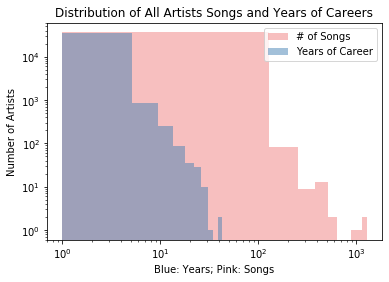

In [11]:
# Plot hist of career
plt.hist(career_df['song count'], alpha=0.5, color='lightcoral', label='# of Songs')
plt.hist(career_df['years of career'], alpha=0.5, color='steelblue', label='Years of Career')

plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')
plt.title('Distribution of All Artists Songs and Years of Careers')
plt.xlabel('Blue: Years; Pink: Songs')
plt.ylabel('Number of Artists')

plt.show()

# plt.savefig('../images/industry_career.png')

## Quetion: What does the popularity look like over the years?

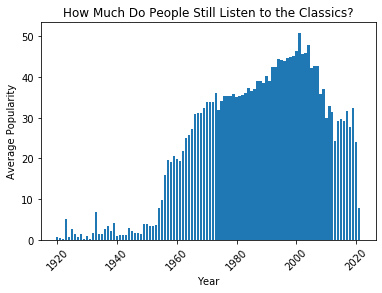

In [29]:
# Create a dataframe with year and the average popualrity of all songs from each year
popularity_group = df.groupby('year')
popularity_year_df = pd.DataFrame(popularity_group['popularity'].mean()).reset_index()

# Plot a bar chart
plt.bar(popularity_year_df['year'], popularity_year_df['popularity'])
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('How Much Do People Still Listen to the Classics?')
plt.xticks(rotation = 45)

# Save figure
plt.savefig('../images/avg_pop_over_years.png')

## Question: How have the popularity of the most timeless artists changed over time?

In [19]:
# Filter the original data by only the 5 most "timeless" artists
top_5_timeless = []
for index in np.arange(5):
    top_5_timeless.append(f"['{career_df.iloc[index, 0]}']")

filt = df['artists'].isin(top_5_timeless)
top_5_df = df.loc[filt]

top_5_df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
3077,0.365,['Miles Davis'],0.432,159773,0.228,0,2JESSNdz06LHxm7hH2xSGB,0.000004,8,0.1720,-16.758,1,Blue Xmas (To Whom It May Concern),29,0.0667,94.998,0.378,1936
3260,0.896,['Aretha Franklin'],0.648,186160,0.356,0,0ve9Bx23zcrkmDbSWF0VVf,0.000036,7,0.1100,-13.917,0,It Ain't Necessarily So - from Porgy and Bess,7,0.0837,86.735,0.529,1936
3398,0.894,['Mohammed Rafi'],0.521,205454,0.554,0,7fi0bkmNYtIZIVAPG91uuO,0.001840,8,0.0931,-8.016,1,Koi Sone Ke Dilwala,5,0.0369,102.160,0.875,1937
3754,0.958,['Frank Sinatra'],0.309,177947,0.207,0,1hHExpIRbvXfza1UyZmhIt,0.099300,9,0.6320,-13.665,0,Let's Get Lost,16,0.0366,111.366,0.206,1939
3795,0.968,['Frank Sinatra'],0.236,161613,0.234,0,1xLfz7M1dNQNXNiYIBfQhi,0.002520,8,0.5630,-13.870,1,Long Ago And Far Away,12,0.0330,97.282,0.273,1939


In [20]:
# Calculate average popularity in each year for each artist
avg_pop_df = pd.DataFrame(top_5_df.groupby(['year', 'artists'])['popularity'].mean()).reset_index()
avg_pop_df.rename(columns={'popularity': 'avg_popularity'}, inplace=True)

In [21]:
johnny = avg_pop_df.loc[avg_pop_df['artists'] == f'{top_5_timeless[0]}']
frank = avg_pop_df.loc[avg_pop_df['artists'] == f'{top_5_timeless[1]}']
mohammed = avg_pop_df.loc[avg_pop_df['artists'] == f'{top_5_timeless[2]}']
aretha = avg_pop_df.loc[avg_pop_df['artists'] == f'{top_5_timeless[3]}']
miles = avg_pop_df.loc[avg_pop_df['artists'] == f'{top_5_timeless[4]}']

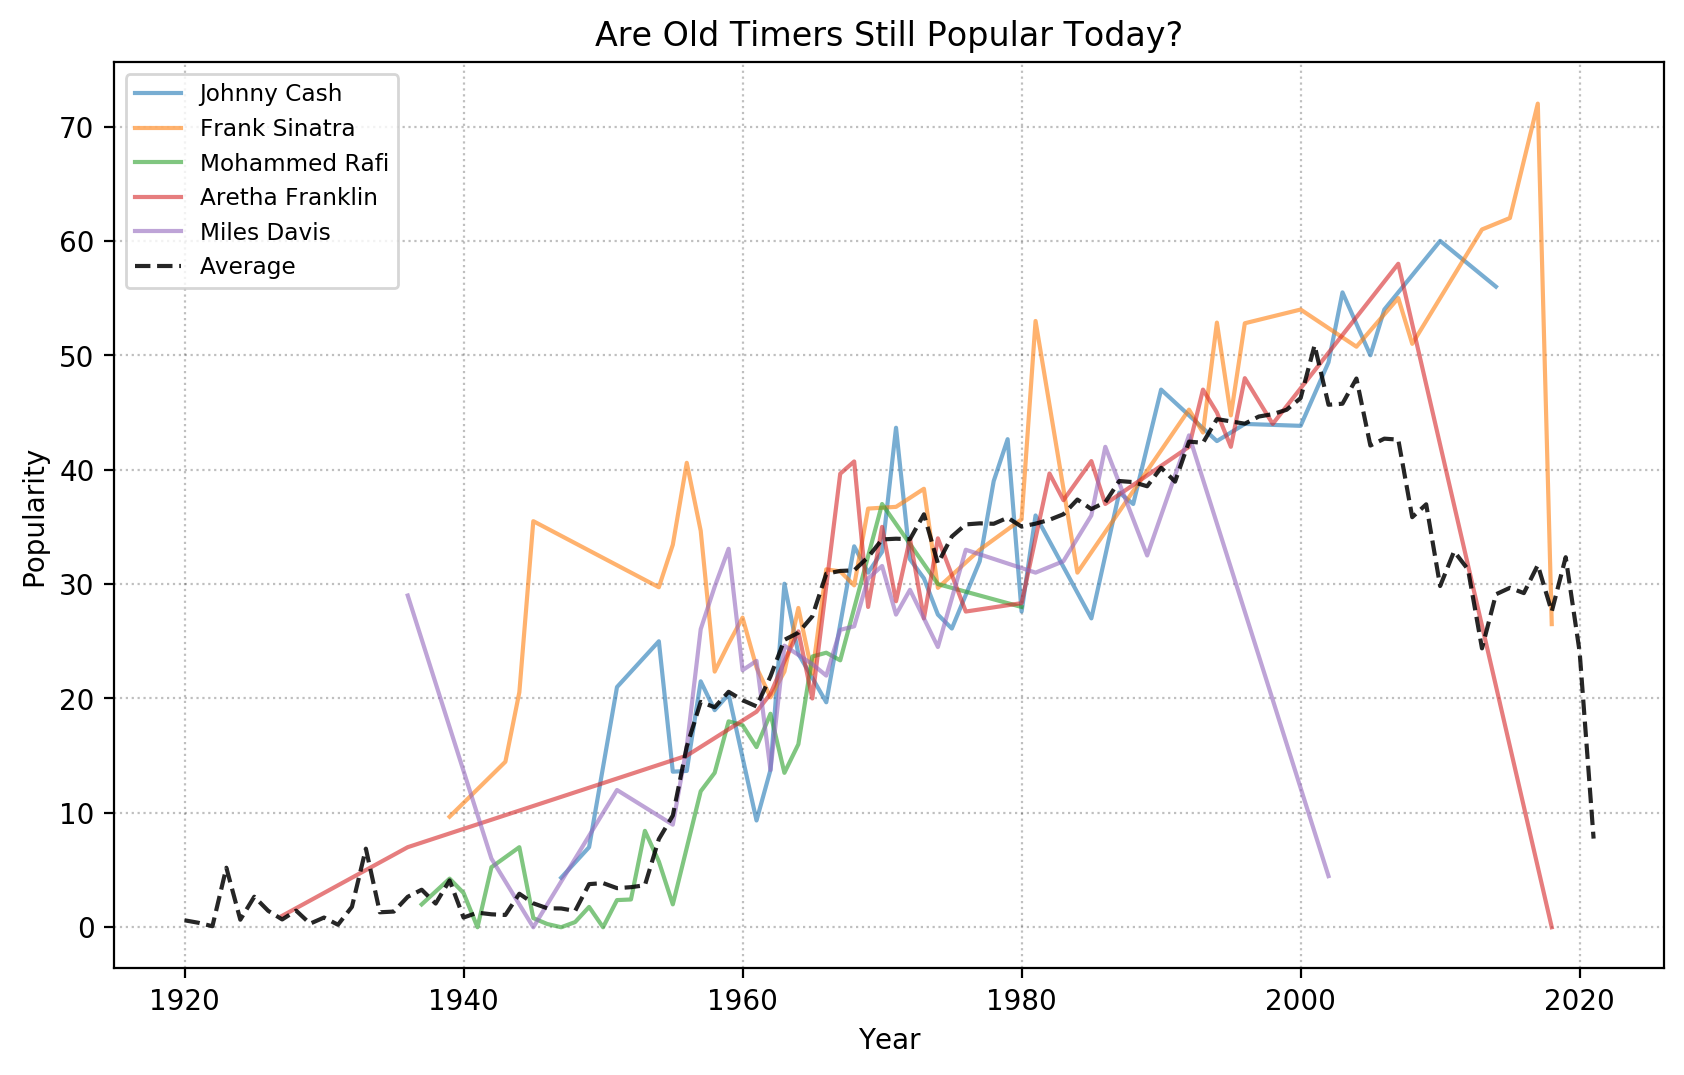

In [32]:
# Plotting
plt.figure(figsize=(10,6), dpi=200)

plt.plot(johnny['year'], johnny['avg_popularity'], label='Johnny Cash', alpha=0.6)
plt.plot(frank['year'], frank['avg_popularity'], label='Frank Sinatra', alpha=0.6)
plt.plot(mohammed['year'], mohammed['avg_popularity'], label='Mohammed Rafi', alpha=0.6)
plt.plot(aretha['year'], aretha['avg_popularity'], label='Aretha Franklin', alpha=0.6)
plt.plot(miles['year'], miles['avg_popularity'], label='Miles Davis', alpha=0.6)

# Plot the average popularity of the entire dataset over years to compare
plt.plot(popularity_year_df['year'], popularity_year_df['popularity'], label='Average',
         color='black', alpha=0.85, linestyle='--')

plt.grid(True, color='k', linestyle=':', alpha=0.25)
plt.title("Are Old Timers Still Popular Today?")
plt.xlabel("Year")
plt.ylabel("Popularity")
# plt.ylim(0, 100)
plt.legend(loc='best', fontsize='small')

# Save figure
plt.savefig('../images/old_timers_plot.png')

plt.show()

#### On a per artist level

In [23]:
df_artist.shape

(32539, 16)

In [24]:
df_artist.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


#### On a per genre level

In [25]:
df_genre.shape

(3232, 14)

In [26]:
df_genre.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,21st century classical,0.754600,0.284100,3.525932e+05,0.159580,0.484374,0.168580,-22.153400,0.062060,91.351000,0.143380,6.600000,4,1
1,432hz,0.485515,0.312000,1.047430e+06,0.391678,0.477250,0.265940,-18.131267,0.071717,118.900933,0.236483,41.200000,11,1
2,8-bit,0.028900,0.673000,1.334540e+05,0.950000,0.630000,0.069000,-7.899000,0.292000,192.816000,0.997000,0.000000,5,1
3,[],0.535793,0.546937,2.495312e+05,0.485430,0.278442,0.220970,-11.624754,0.101511,116.068980,0.486361,12.350770,7,1
4,a cappella,0.694276,0.516172,2.018391e+05,0.330533,0.036080,0.222983,-12.656547,0.083627,105.506031,0.454077,39.086248,7,1


#### On a per genre level

In [27]:
df_year.shape

(102, 14)

In [28]:
df_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1
